# Generating Problems
Problem is represented as a python dictionary:

In [1]:
problem = {}

We should set the name of the problem

In [2]:
problem["problem_name"] = "demo_problem"

First we can set some geometric parameters, like the number of horizontal and vertical turns, max gradient and material cost.

In [3]:
problem["max_horizontal_turns"] = 2
problem["max_vertical_turns"] = 2
problem["basic_material_cost"] = 1
problem["max_gradient"] = 0.05

Set the problem area and obstacles:

In [4]:
limits = {    
    "x": [0, 3000],
    "y": [0, 1000],
    "z": [0, 100]
}

obstacles = [
    {
        "type": "circle",
        "center": [1000, 800],
        "r": 200,
        "price": 10
    },
    {
        "type": "sphere",
        "center": [2700, 450, 50],
        "r": 50,
        "price": 10
    },
    {
        "type": "polygon",
        "points": [
            [1500, 700],
            [1900, 400],
            [1700, 400],
            [1700, 0],
            [1300, 0],
            [1300, 400],
            [1100, 400]
        ],
        "z": [10, 100]
    }
]

problem["bounds"] = {
    "limits": limits,
    "obstacles": obstacles
}


Start, end and given points are set in the following way:

In [5]:
start_point = {
    "x": 100,
    "y": 500,
    "z": 50,
    "r_max": 30,
    "h_angle": 0,
    "h_angle_tol": 45,
    "v_angle": 0,
    "v_angle_tol": 5
}
end_point = {
    "x": 2900,
    "y": 500,
    "z": 50,
    "r_max": 30,
    "h_angle": -180,
    "h_angle_tol": 45,
    "v_angle": -180,
    "v_angle_tol": 5
}
given_points = [{
    "x": 2500,
    "y": 400,
    "z": 50,
    "r_max": 50,
    "h_angle": 0,
    "h_angle_tol": 180,
    "v_angle": 0,
    "v_angle_tol": 5,
    "order": 0.5
}]

problem["points"] = {
    "start_point": start_point,
    "end_point": end_point,
    "given_points": given_points,
    "free_points_threshold": 0.25
}



It's best to leave the evaluation tree and lists of constraints and objectives as is here:

In [6]:
problem["evaluation_tree"] = {
    "weight": 1,
    "direction": "min",
    "norm_min": 0,
    "norm_max": 1,
    "inputs": {
        "costs": {
            "weight": 0.5,
            "direction": "min",
            "norm_min": 0,
            "norm_max": 100000
        },
        "effects": {
            "weight": 0.5,
            "direction": "min",
            "bound": 0,
            "norm_min": 0,
            "norm_max": 0.6,
            "inputs": {
                "horizontal_curvature": {
                    "weight": 0.1,
                    "direction": "min",
                    "norm_min": 0,
                    "norm_max": 1,
                    "bound": 0.1
                },
                "vertical_curvature": {
                    "weight": 0.1,
                    "direction": "min",
                    "norm_min": 0,
                    "norm_max": 1,
                    "bound": 0.1
                },
                "gradient": {
                    "weight": 0.1,
                    "direction": "min",
                    "norm_min": 0,
                    "norm_max": 1,
                    "bound": 0.05
                },
                "point_distance_deviation": {
                    "weight": 0.1,
                    "direction": "min",
                    "norm_min": 0,
                    "norm_max": 3000,
                    "bound": 0
                },
                "point_horizontal_angle_deviation": {
                    "weight": 0.1,
                    "direction": "min",
                    "norm_min": 0,
                    "norm_max": 3.141592653589793,
                    "bound": 0
                },
                "point_vertical_angle_deviation": {
                    "weight": 0.1,
                    "direction": "min",
                    "norm_min": 0,
                    "norm_max": 3.141592653589793,
                    "bound": 0
                }
            }
        }
    }
}


In [7]:
problem["objectives"] = ["costs", "effects"]

problem["constraints"] = ["horizontal_curvature", "vertical_curvature", "gradient", "point_distance_deviation", 
                          "point_horizontal_angle_deviation", "point_vertical_angle_deviation"]

problem["hard_constraints"] = ["out_of_bound_points", "hard_constraint_obstacles", 
                               "horizontal_turns", "vertical_turns", "self_intersections"]

We should set the ideal and nadir points for calculation of performance metrics.

In [8]:
problem["ideal"] = [0, 0]
problem["nadir"] = [1, 1]

Finally we can create a TunnelAlignmentProblem object and plot it

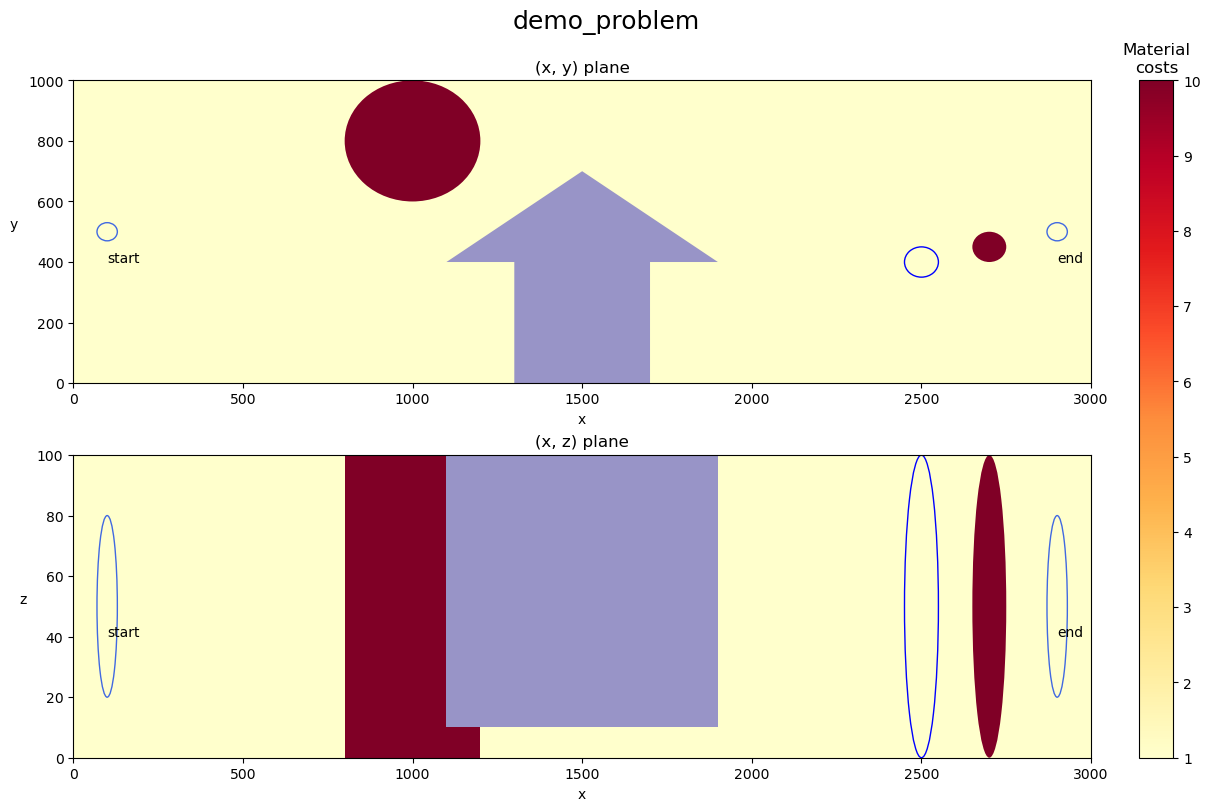

In [9]:
from tap.problem import TunnelAlignmentProblem
tap_problem = TunnelAlignmentProblem(problem, "AFV")
fig = tap_problem.plot_problem()

To quickly run the optimization, we can use the pymoo library. First we wrap the TunnelAlignmentProblem object in a PymooProblem object

In [10]:
from tap.pymoo_problem import PymooProblem
pymoo_problem = PymooProblem(tap_problem)

Then we can run the optimization using pymoo

In [11]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.termination import get_termination

algorithm = NSGA2(pop_size=100)
termination = get_termination("n_eval", 1000)
result = minimize(pymoo_problem, algorithm, termination, verbose=True, seed=42)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      2 |  0.000000E+00 |  5.8063661670 |             - |             -
     2 |      200 |      2 |  0.000000E+00 |  4.3548929956 |  0.6746845192 |         ideal
     3 |      300 |      4 |  0.000000E+00 |  2.4933075831 |  0.2100512420 |             f
     4 |      400 |      5 |  0.000000E+00 |  0.0012096046 |  0.2670364128 |         ideal
     5 |      500 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0457576420 |             f
     6 |      600 |      5 |  0.000000E+00 |  0.000000E+00 |  0.3912966281 |         ideal
     7 |      700 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0027941513 |         nadir
     8 |      800 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0054907459 |             f
     9 |      900 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0767862265 |         ideal
    10 |     1000 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0441936423 |         ideal

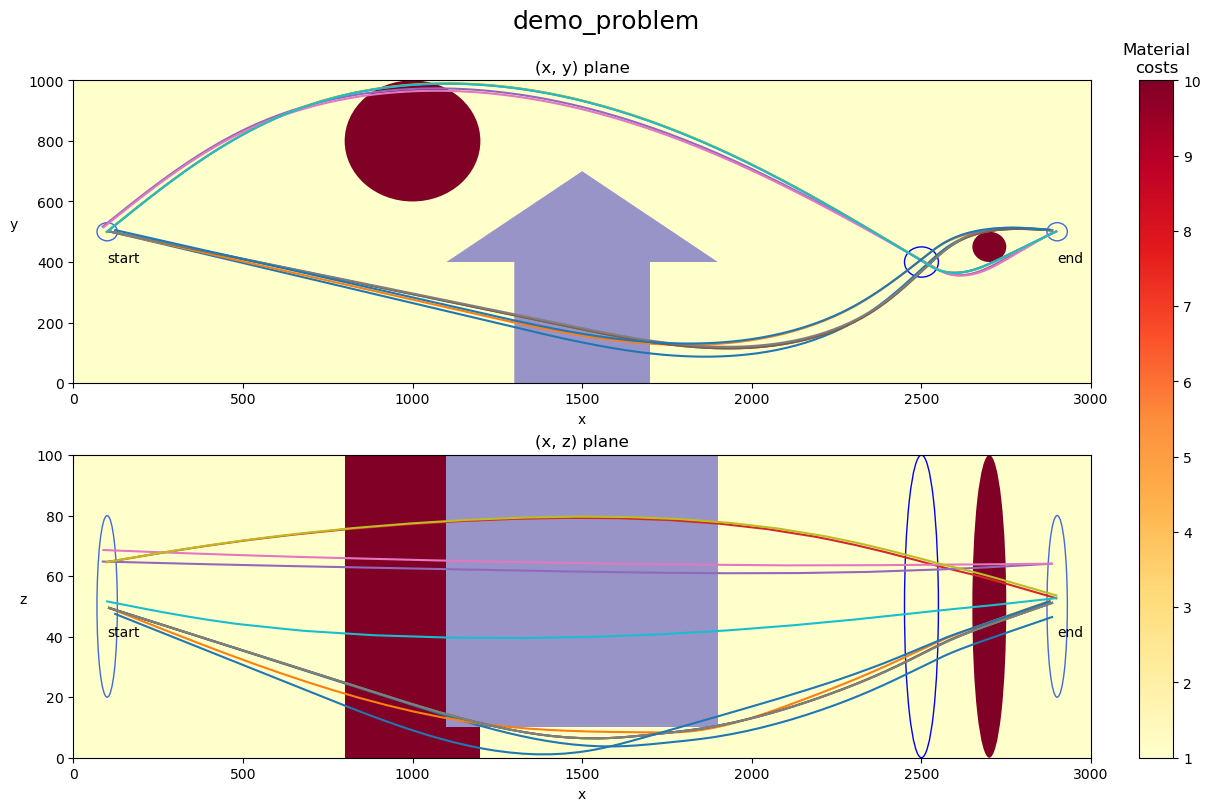

In [12]:
non_dominated_results = result.X
fig2 = tap_problem.plot_problem(non_dominated_results)